# Practice Project - 7
BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.
    
Problem Statement:
    
Business Use Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Problem Statement

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

About The Dataset

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

You are provided with following 2 files:

1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.

2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.

 

Dataset Attributes

Here is the description of all the variables :

Variable: Definition
    
ID: Unique client ID
    
age: Age of the client
    
job: Type of job
    
marital: Marital status of the client
    
education: Education level
    
default: Credit in default.
    
housing: Housing loan
    
loan: Personal loan
    
contact: Type of communication
    
month: Contact month
    
day_of_week: Day of week of contact
    
duration: Contact duration
    
campaign: number of contacts performed during this campaign to the client
    
pdays: number of days that passed by after the client was last contacted
    
previous: number of contacts performed before this campaign
    
poutcome: outcome of the previous marketing campaign
    
Output variable (desired target):
    
Subscribed (target): has the client subscribed a term deposit? (YES/NO)
 

Datasets:

Downlaod Files:
    
https://github.com/dsrscientist/dataset5
    
https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv
    
https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv    

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import warnings

# GETTING THE DATASET

# Training Dataset

In [2]:
df=pd.read_csv('Bank_deposit_train.csv')
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


# Testing Dataset

In [3]:
df1=pd.read_csv('Bank_deposit_test.csv')
df1.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


# EDA 

In [4]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [5]:
df1.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [6]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [7]:
df1.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [8]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [9]:
df1.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [10]:
df.shape

(31647, 18)

In [11]:
df1.shape

(13564, 17)

# Data Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='ID', ylabel='count'>

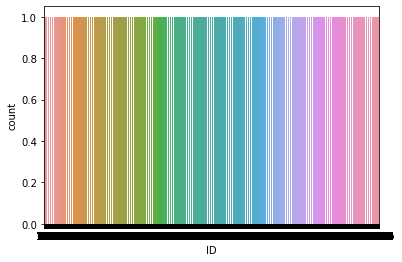

In [13]:
sns.countplot(df['ID'])

<AxesSubplot:xlabel='age', ylabel='job'>

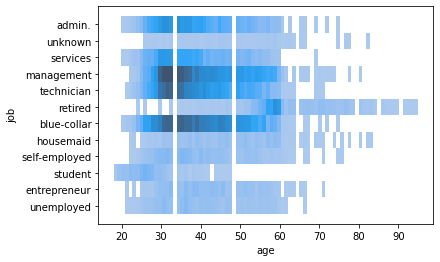

In [14]:
sns.histplot(data=df,x='age',y='job')

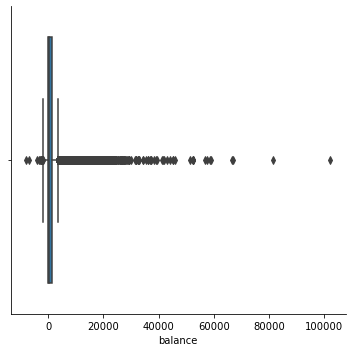

In [15]:
sns.catplot(data=df,x='balance',kind='box')

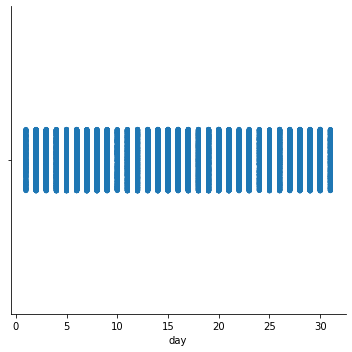

In [16]:
sns.catplot(data=df,x='day')

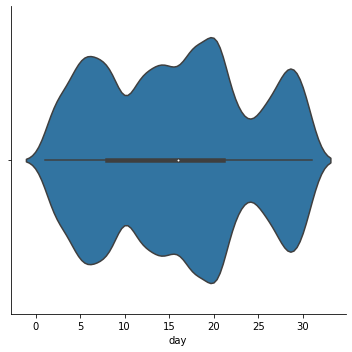

In [17]:
sns.catplot(data=df,x='day',kind='violin')

<AxesSubplot:xlabel='duration', ylabel='Count'>

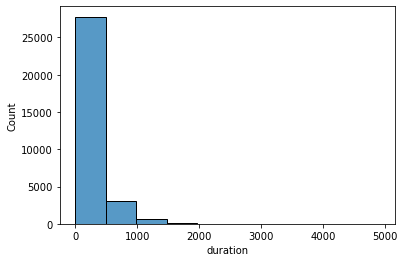

In [18]:
sns.histplot(data=df,x='duration',bins=10)

<AxesSubplot:xlabel='campaign', ylabel='pdays'>

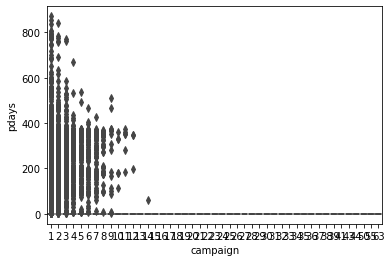

In [19]:
sns.boxplot(data=df,x='campaign',y='pdays')

# CONCATING BOTH DATASETS

In [20]:
df3=pd.concat([df,df1],axis=1)
df3.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,...,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,...,yes,no,cellular,15.0,may,20.0,6.0,-1.0,0.0,unknown
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,...,no,no,telephone,1.0,jul,372.0,1.0,-1.0,0.0,unknown
2,15320,27,services,married,secondary,no,891,yes,no,cellular,...,yes,no,unknown,16.0,may,676.0,1.0,-1.0,0.0,unknown
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,...,yes,no,telephone,13.0,may,65.0,2.0,-1.0,0.0,unknown
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,...,no,yes,unknown,3.0,jul,111.0,1.0,-1.0,0.0,unknown
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,...,yes,no,cellular,22.0,jul,455.0,2.0,-1.0,0.0,unknown
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,...,yes,no,unknown,5.0,may,309.0,2.0,-1.0,0.0,unknown
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,...,no,no,unknown,3.0,jun,120.0,2.0,-1.0,0.0,unknown
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,...,no,no,cellular,2.0,mar,149.0,1.0,-1.0,0.0,unknown
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,...,yes,no,cellular,15.0,may,119.0,4.0,372.0,3.0,failure


In [21]:
df3.shape

(31647, 35)

 Here concating is not working as only one column is extra in the test data , so we merge both 

# MERGING DATASETS

In [22]:
df_merged=pd.concat([df,df1],ignore_index=True,sort=False)
df_merged

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown,NaN
45207,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown,NaN
45208,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown,NaN
45209,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,NaN


# MORE EDA

In [23]:
df_merged.shape

(45211, 18)

In [24]:
pd.set_option('display.max_columns',None)

In [25]:
df_merged['subscribed']

0         no
1         no
2         no
3        yes
4         no
        ... 
45206    NaN
45207    NaN
45208    NaN
45209    NaN
45210    NaN
Name: subscribed, Length: 45211, dtype: object

In [26]:
df_merged['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [27]:
df_merged.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [28]:
df_merged.isnull().sum()

ID                0
age               0
job               0
marital           0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
subscribed    13564
dtype: int64

In [29]:
df_merged.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

# REMOVING DUPLICATES

In [30]:
df_merged['ID'].duplicated().sum()

0

In [31]:
df_merged['age'].duplicated().sum()

45134

In [32]:
df_merged['job'].duplicated().sum()

45199

In [33]:
df_merged['marital'].duplicated().sum()

45208

In [34]:
df_merged['education'].duplicated().sum()

45207

In [35]:
df_merged['default'].duplicated().sum()

45209

In [36]:
df_merged['balance'].duplicated().sum()

38043

In [37]:
df_merged['housing'].duplicated().sum()

45209

In [38]:
df_merged['loan'].duplicated().sum()

45209

In [39]:
df_merged['contact'].duplicated().sum()

45208

In [40]:
df_merged['day'].duplicated().sum()

45180

In [41]:
df_merged['month'].duplicated().sum()

45199

In [42]:
df_merged['duration'].duplicated().sum()

43638

In [43]:
df_merged['campaign'].duplicated().sum()

45163

In [44]:
df_merged['pdays'].duplicated().sum()

44652

In [45]:
df_merged['previous'].duplicated().sum()

45170

In [46]:
df_merged['poutcome'].duplicated().sum()

45207

In [47]:
df_merged['subscribed'].duplicated().sum()

45208

In [48]:
df_merged.drop_duplicates()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown,NaN
45207,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown,NaN
45208,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown,NaN
45209,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,NaN


In [49]:
df_merged.duplicated().sum()

0

In [50]:
df_merged.shape

(45211, 18)

In [51]:
df_merged.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

# TRANSFORMING DATA-TYPES 

In [52]:
import sklearn
from sklearn.preprocessing import OrdinalEncoder
ordin=OrdinalEncoder()

In [53]:
for i in df_merged.columns:
    if df_merged[i].dtypes=='object':
        df_merged[i]=ordin.fit_transform(df_merged[i].values.reshape(-1,1))

In [54]:
df_merged.isnull().sum()

ID                0
age               0
job               0
marital           0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
subscribed    13564
dtype: int64

# FILLING NULL DATAS

In [55]:
df_merged['subscribed']=df_merged['subscribed'].fillna(np.mean(df_merged['subscribed']))

In [56]:
df_merged['subscribed']

0        0.000000
1        0.000000
2        0.000000
3        1.000000
4        0.000000
           ...   
45206    0.117389
45207    0.117389
45208    0.117389
45209    0.117389
45210    0.117389
Name: subscribed, Length: 45211, dtype: float64

# CONVERTING TARGET VARIABLE INTO INTEGER

In [57]:
df_merged['subscribed']=df_merged['subscribed'].astype(int)

In [58]:
df_merged['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: subscribed, Length: 45211, dtype: int32

In [59]:
df_merged['subscribed'].value_counts()

0    41496
1     3715
Name: subscribed, dtype: int64

<AxesSubplot:xlabel='subscribed'>

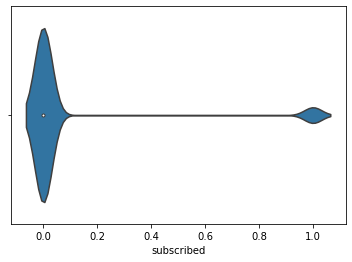

In [180]:
sns.violinplot(df_merged['subscribed'])

# DATA CLENSING

In [60]:
df_merged.describe()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974,0.082170
std,13051.435847,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059,0.274627
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,11303.500000,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,22606.000000,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,33908.500000,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,45211.000000,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [61]:
df_merged.drop(['balance','pdays'],axis=1,inplace=True)

In [62]:
df_merged.shape

(45211, 16)

In [63]:
df_merged.corr()

,ID,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,previous,poutcome,subscribed
ID,1.000000,0.014973,0.063002,0.081781,0.094658,-0.053098,-0.176143,-0.084240,-0.722366,-0.061465,-0.162055,0.013031,-0.102884,0.271098,-0.445365,0.242887
age,0.014973,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,0.001288,0.007367,0.020737
job,0.063002,-0.021868,1.000000,0.062045,0.166707,-0.006853,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.000911,0.011010,0.031299
marital,0.081781,-0.403240,0.062045,1.000000,0.108576,-0.007023,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.014973,-0.016850,0.037462
education,0.094658,-0.106807,0.166707,0.108576,1.000000,-0.010718,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.017570,-0.019361,0.054358
default,-0.053098,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.018329,0.034898,-0.015720
housing,-0.176143,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.037076,-0.099971,-0.115889
loan,-0.084240,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.011043,0.015458,-0.058019
contact,-0.722366,0.026221,-0.082063,-0.039201,-0.110928,0.015404,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.147811,0.272214,-0.121851
day,-0.061465,-0.009120,0.022856,-0.005261,0.022671,0.009424,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.051710,0.083460,-0.023283


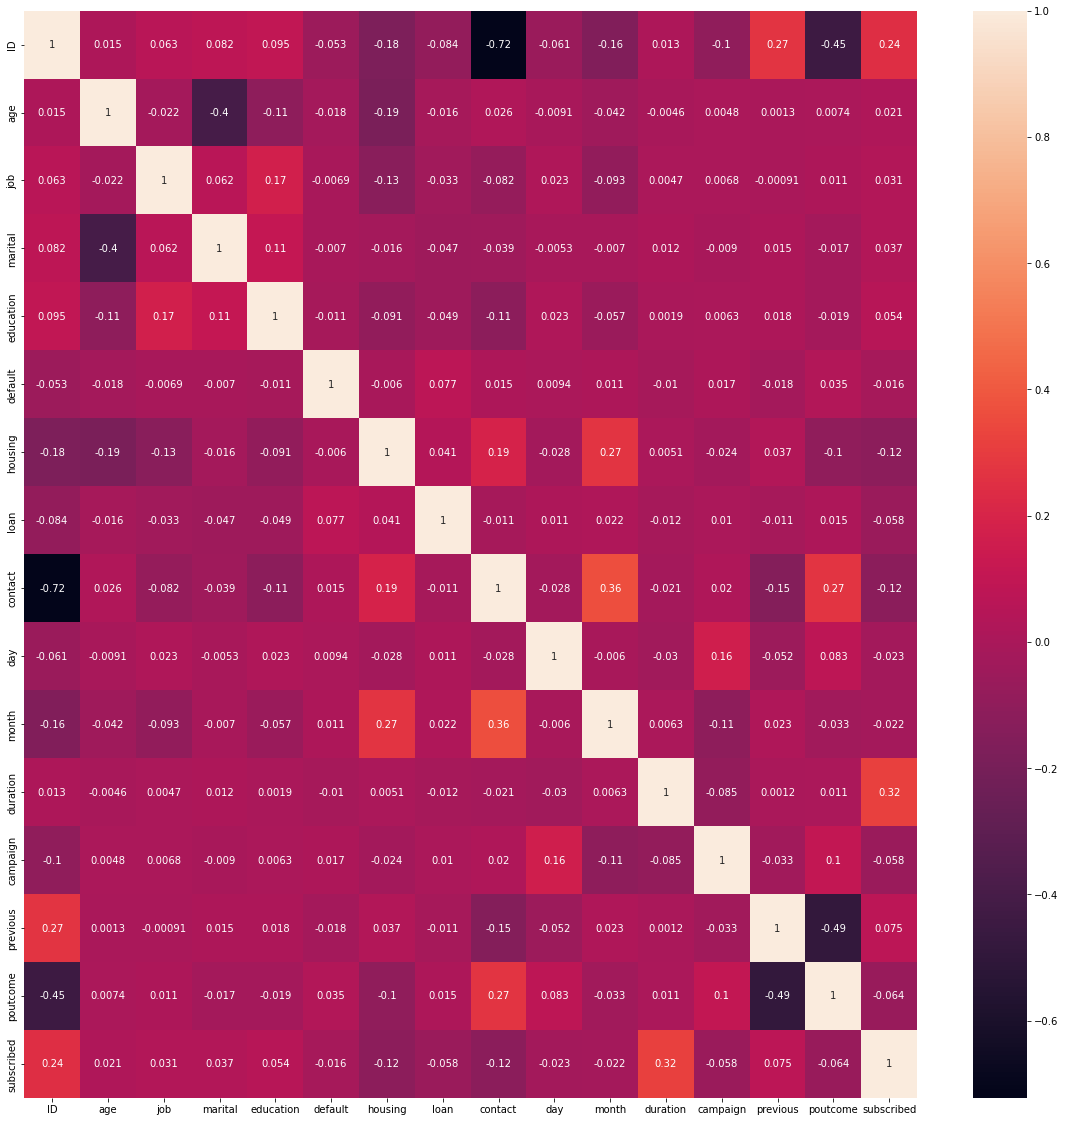

In [64]:
plt.figure(figsize=(20,20))
sns.heatmap(df_merged.corr(),annot=True)
plt.show()

In [65]:
df_merged.drop('ID',axis=1,inplace=True)

In [66]:
df_merged.shape

(45211, 15)

<AxesSubplot:>

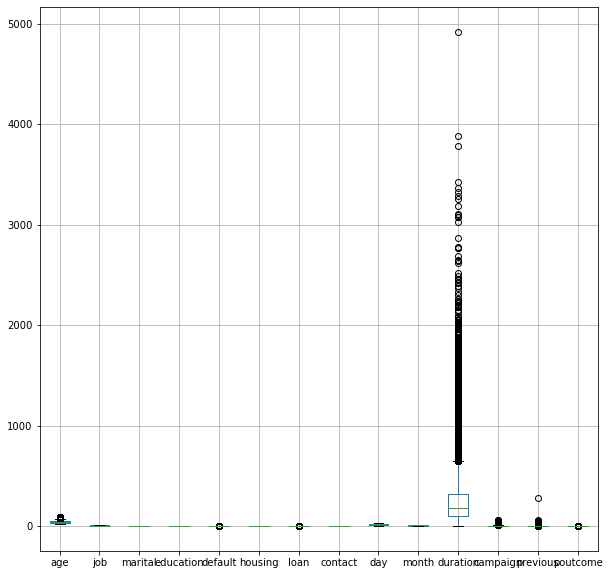

In [67]:
df_merged.iloc[:,0:-1].boxplot(figsize=(10,10))

In [68]:
df_merged.skew()

age            0.684818
job            0.261755
marital       -0.102826
education      0.197275
default        7.245375
housing       -0.224766
loan           1.852617
contact        0.769381
day            0.093079
month         -0.480272
duration       3.144318
campaign       4.898650
previous      41.846454
poutcome      -1.973561
subscribed     3.043024
dtype: float64

# SPLITTING X AND Y

In [69]:
x=df_merged.iloc[:,:-1]
y=df_merged['subscribed']

# REMOVING OUTLIERS

In [70]:
from scipy.stats import zscore
z=np.abs(zscore(x))

In [71]:
dfnew=x[(z<3).all(axis=1)]

In [72]:
dfnew.skew()

age          0.443729
job          0.263280
marital     -0.101435
education    0.194811
default      0.000000
housing     -0.241901
loan         1.880639
contact      0.760609
day          0.103577
month       -0.498578
duration     1.589116
campaign     2.089841
previous     3.232894
poutcome    -2.020910
dtype: float64

In [73]:
dfnew.drop('previous',axis=1,inplace=True)

In [74]:
dfnew.shape

(41717, 13)

# BALANCING X AND Y

In [75]:
from sklearn.preprocessing import power_transform

In [76]:
newx=power_transform(x)

In [77]:
dfx=pd.DataFrame(data=newx,columns=x.columns)
dfx.head()

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,1.343682,-1.611098,-0.286301,2.201328,-0.13549,-1.118674,-0.436803,1.058378,0.443836,1.191842,-1.433850,0.134537,-0.47250,0.469810
1,-0.964433,1.652351,-0.286301,-0.254415,-0.13549,-1.118674,-0.436803,-0.734953,0.552958,-0.219256,-0.746583,0.134537,-0.47250,0.469810
2,-1.535672,0.857139,-0.286301,-0.254415,-0.13549,0.893915,-0.436803,-0.734953,0.333023,-0.219256,0.289691,-1.108191,-0.47250,0.469810
3,1.409327,0.093094,-1.892104,1.029751,-0.13549,-1.118674,-0.436803,-0.734953,0.766540,0.123104,1.893855,-1.108191,2.16663,-1.581037
4,-0.964433,1.277591,-0.286301,-0.254415,-0.13549,0.893915,-0.436803,-0.734953,-1.515435,-0.877030,0.831618,-1.108191,-0.47250,0.469810


In [78]:
y.value_counts()

0    41496
1     3715
Name: subscribed, dtype: int64

<AxesSubplot:xlabel='subscribed', ylabel='count'>

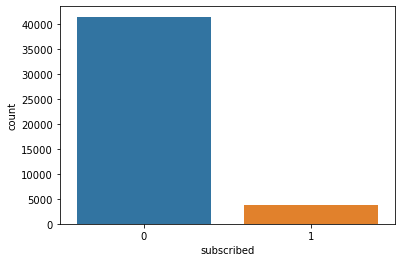

In [79]:
sns.countplot(y)

In [80]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_train,y_train=smt.fit_resample(dfx,y)

In [81]:
y_train.value_counts()

0    41496
1    41496
Name: subscribed, dtype: int64

<AxesSubplot:xlabel='subscribed', ylabel='count'>

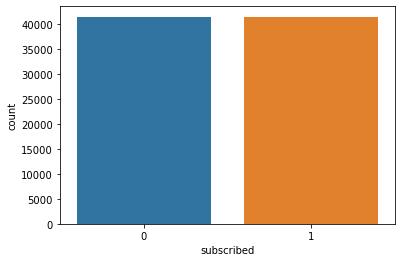

In [82]:
sns.countplot(y_train)

x and y are balanced

# TRAIN_TEST_SPLIT

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [84]:
maxAcc=0
maxRS=0
for i in range(0,1000):
    x_train1,x_test,y_train1,y_test=train_test_split(x_train,y_train,test_size=0.20,random_state=i)
    lr.fit(x_train1,y_train1)
    predlr=lr.predict(x_test)
    score=accuracy_score(y_test,predlr)
    print('R2_score of LogisticRegression ' ,score, 'at random_state ' ,i)
    if score > maxAcc:
        maxAcc=score
        maxRS=i
    print('Mac acc score of lr ' ,maxAcc*100, 'at random_state ' ,maxRS)   

R2_score of LogisticRegression  0.8092656184107476 at random_state  0
Mac acc score of lr  80.92656184107476 at random_state  0
R2_score of LogisticRegression  0.8065546117235978 at random_state  1
Mac acc score of lr  80.92656184107476 at random_state  0
R2_score of LogisticRegression  0.8105909994577987 at random_state  2
Mac acc score of lr  81.05909994577986 at random_state  2
R2_score of LogisticRegression  0.8042653171877824 at random_state  3
Mac acc score of lr  81.05909994577986 at random_state  2
R2_score of LogisticRegression  0.80757876980541 at random_state  4
Mac acc score of lr  81.05909994577986 at random_state  2
R2_score of LogisticRegression  0.8051087414904512 at random_state  5
Mac acc score of lr  81.05909994577986 at random_state  2
R2_score of LogisticRegression  0.8064341225375022 at random_state  6
Mac acc score of lr  81.05909994577986 at random_state  2
R2_score of LogisticRegression  0.8082414603289355 at random_state  7
Mac acc score of lr  81.059099945779

In [86]:
x_train1,x_test,y_train1,y_test=train_test_split(x_train,y_train,test_size=0.20,random_state=111)
lr.fit(x_train1,y_train1)
predlr=lr.predict(x_test)
print((accuracy_score(y_test,predlr))*100)

81.69166817278149


# TUNING LOGISTIC REGRESSION

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
lr=LogisticRegression()
parameters={'C':[100,10,1,0.1,0.01]}
gscv=GridSearchCV(estimator=lr,param_grid=parameters)
gscv.fit(x_train1,y_train1)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01]})

In [89]:
print(gscv.best_params_)

{'C': 100}


In [93]:
lr1=LogisticRegression(C=100)
lr1.fit(x_train1,y_train1)
predlr1=lr1.predict(x_test)
print('Accuracy_score ' ,accuracy_score(y_test,predlr1)*100)

Accuracy_score  81.69166817278149


# TESTING MORE MODELS 

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
knc=KNeighborsClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
etc=ExtraTreesClassifier()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
svc=SVC()

# GETTING ACCURACY_SCORE FOR ALL THE MODELS

In [95]:
model=[knc,gbc,abc,etc,rfc,dtc,svc]
for i in model:
    i.fit(x_train1,y_train1)
    predi=i.predict(x_test)
    print('Accuracy_score of model ' , i ,'is = ' ,accuracy_score(y_test,predi)*100) 

Accuracy_score of model  KNeighborsClassifier() is =  91.71636845593109
Accuracy_score of model  GradientBoostingClassifier() is =  91.17416711850112
Accuracy_score of model  AdaBoostClassifier() is =  87.16187722151936
Accuracy_score of model  ExtraTreesClassifier() is =  96.76486535333454
Accuracy_score of model  RandomForestClassifier() is =  95.5479245737695
Accuracy_score of model  DecisionTreeClassifier() is =  92.28266763058015
Accuracy_score of model  SVC() is =  86.08349900596421


# CROSS_VALIDATION

In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
 for i in range(2,10):
        models=[knc,gbc,abc,etc,rfc,dtc,svc]
        for j in models:
            j.fit(x_train1,y_train1)
            predj=j.predict(x_test)
            score=accuracy_score(y_test,predj)
            cross=cross_val_score(j,x_train1,y_train1,cv=i)
    
            print('Accuracy_score of model ' ,j, 'is equal == ' ,score*100)
            print('Cross validation of model ' ,j, 'is equal == ' ,cross.mean(),'at cv = ' ,i)
            print('Diff between accuracy_score and cross validation of model ' ,j, 'is equal == ' , score-(cross.mean()))

Accuracy_score of model  KNeighborsClassifier() is equal ==  91.71636845593109
Cross validation of model  KNeighborsClassifier() is equal ==  0.8901540872478111 at cv =  2
Diff between accuracy_score and cross validation of model  KNeighborsClassifier() is equal ==  0.027009597311499767
Accuracy_score of model  GradientBoostingClassifier() is equal ==  91.17416711850112
Cross validation of model  GradientBoostingClassifier() is equal ==  0.9069932059598151 at cv =  2
Diff between accuracy_score and cross validation of model  GradientBoostingClassifier() is equal ==  0.004748465225196008
Accuracy_score of model  AdaBoostClassifier() is equal ==  87.16187722151936
Cross validation of model  AdaBoostClassifier() is equal ==  0.866160577845446 at cv =  2
Diff between accuracy_score and cross validation of model  AdaBoostClassifier() is equal ==  0.005458194369747704
Accuracy_score of model  ExtraTreesClassifier() is equal ==  96.9094523766492
Cross validation of model  ExtraTreesClassifier

# AS etc and rfc having CLOSEST diff between accuracy_score and cross_val_score, lets find the best model which have the closest diff

In [99]:
 for i in range(2,10):
        models=[etc,rfc]
        for j in models:
            j.fit(x_train1,y_train1)
            predj=j.predict(x_test)
            score=accuracy_score(y_test,predj)
            cross=cross_val_score(j,x_train1,y_train1,cv=i)
    
            print('Accuracy_score of model ' ,j, 'is equal == ' ,score*100)
            print('Cross validation of model ' ,j, 'is equal == ' ,cross.mean(),'at cv = ' ,i)
            print('Diff between accuracy_score and cross validation of model ' ,j, 'is equal == ' , score-(cross.mean()))

Accuracy_score of model  ExtraTreesClassifier() is equal ==  96.84920778360141
Cross validation of model  ExtraTreesClassifier() is equal ==  0.9503260704337131 at cv =  2
Diff between accuracy_score and cross validation of model  ExtraTreesClassifier() is equal ==  0.01816600740230112
Accuracy_score of model  RandomForestClassifier() is equal ==  95.58407132959816
Cross validation of model  RandomForestClassifier() is equal ==  0.9399635621573184 at cv =  2
Diff between accuracy_score and cross validation of model  RandomForestClassifier() is equal ==  0.01587715113866328
Accuracy_score of model  ExtraTreesClassifier() is equal ==  96.86125670221098
Cross validation of model  ExtraTreesClassifier() is equal ==  0.9579624357989548 at cv =  3
Diff between accuracy_score and cross validation of model  ExtraTreesClassifier() is equal ==  0.010650131223154946
Accuracy_score of model  RandomForestClassifier() is equal ==  95.62021808542683
Cross validation of model  RandomForestClassifier()

# HYPERTUNING

In [100]:
from sklearn.model_selection import GridSearchCV

In [143]:
mod=[etc,rfc]
for i in mod:
    parameters={'n_estimators':[50,100,150,200],
            'criterion':['gini','squared_error'],
            'max_depth':[1,2,3],
            'max_features':['auto','sqrt','log2']}
    gscv=GridSearchCV(estimator=i,param_grid=parameters)
    gscv.fit(x_train1,y_train1)

In [144]:
print(gscv.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 50}


In [145]:
print(gscv.best_estimator_)

RandomForestClassifier(max_depth=3, max_features='auto', n_estimators=50)


# COMPARING MODELS

In [128]:
a=np.array(y_test)
 
e=np.array(etc.predict(x_test))
r=np.array(rfc.predict(x_test))
df_trial=pd.DataFrame({'Actual_result':a,'Extra Trees':e,'RandomForest':r},index=range(len(a)))
df_trial.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

# GETTING THE BEST MODEL (based on closest diff between model_accuracy and cross_val_score)

In [172]:
GSCV=GridSearchCV(estimator=RandomForestClassifier(max_depth=3,max_features='auto',n_estimators=50),param_grid=parameters)
GSCV.fit(x_train1,y_train1)

GridSearchCV(estimator=RandomForestClassifier(max_depth=3, max_features='auto',
                                              n_estimators=50),
             param_grid={'criterion': ['gini', 'squared_error'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

# Although ExtraTrees have highest accuracy_score but RandomForest has closest diff between its accuracy_score and cross_val_score , so RandomForestClassifier is selected as the best model. 

# GETTING ROC_CURVE and Auc_Roc_Score

In [130]:
from sklearn.metrics import roc_curve

In [154]:
fpr,tpr,thresholds=roc_curve(y_test,rfc.predict(x_test))

In [155]:
fpr

array([0.        , 0.25165802, 1.        ])

In [156]:
tpr

array([0.        , 0.85745244, 1.        ])

In [157]:
thresholds

array([2, 1, 0])

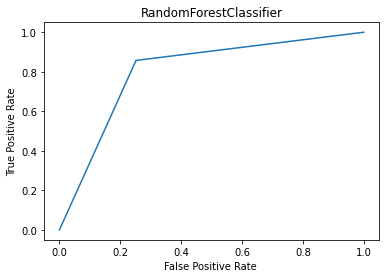

In [158]:
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel("False Positive Rate ")
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier')
plt.show()

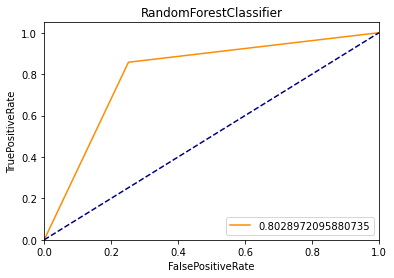

In [159]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,rfc.predict(x_test))
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',label=roc_auc)
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlabel('FalsePositiveRate')
plt.ylabel('TruePositiveRate')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()

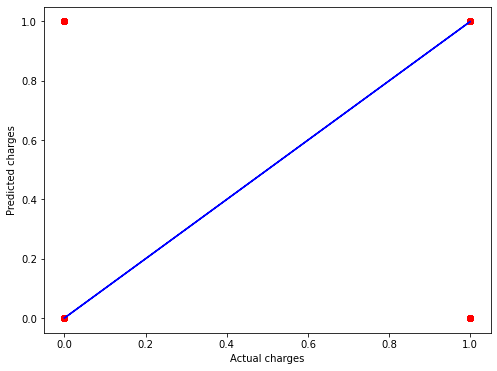

In [167]:
plt.figure(figsize=(8,6))
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.scatter(x=y_test,y=rfc.predict(x_test),color='r')
plt.plot(y_test,y_test,color='b')
plt.savefig('etc.png')
plt.show()

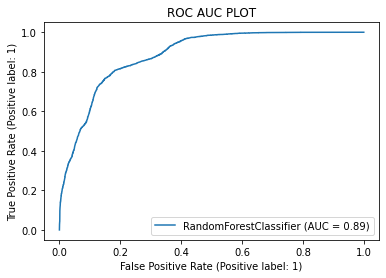

In [168]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gscv.best_estimator_,x_test,y_test)
plt.title('ROC AUC PLOT')
plt.show()

# SAVING THE BEST MODEL

In [129]:
import pickle

In [174]:
filename='Bank_deposit_predict.pkl'
pickle.dump(GSCV.best_estimator_,open(filename,'wb'))

# LOADED THE BEST SAVED MODEL

In [175]:
pickle.load(open(filename,'rb'))

RandomForestClassifier(max_depth=3, max_features='auto', n_estimators=150)